In [70]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import plotly.express as px

import sklearn.model_selection
import numpy as np

from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer

In [135]:
RANDOM_STATE = 120

# Model selection
- Splitting the data : Initially, the dataset is divided into training and validation sets. The training set is usedto train different models with various hyperparameters, and the validation set is used to assess theirperformance.

- Cross validation : Cross-validation is employed to evaluate the model's performance across differentsubsets of the data. This helps in selecting the best model and its corresponding hyperparameters.

- Selecting the Best Model : Once the best model and hyperparameters are identified based oncross-validation performance, the next step is to use these to train a final model.

- training the final model : The final model is then trained on the entire training dataset using the selectedhyperparameters. This is often done to ensure that the model learns from the full diversity of the trainingdata and captures the underlying patterns more effectively

- Evaluation : After training the final model, it is typically evaluated on a separate test set that the modelhas never seen during training or cross-validation. This provides an unbiased assessment of the model'sgeneralization performance on new, unseen data.

In [71]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

In [88]:
target_column = 'SalePrice'


numerical_df = train_df.select_dtypes(include='number')
categorical_df = train_df.select_dtypes(exclude='number')
#numerical_df = numerical_df.drop(columns=['Id', target_column])
numerical_df = numerical_df.dropna(axis=1)
numerical_columns = [column for column in numerical_df.columns
                           if column
                           in test_df.dropna(axis=1).columns]
numerical_df=numerical_df[numerical_columns+[target_column]]

y=train_df[target_column]

numerical_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,856,854,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,1262,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,920,866,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,961,756,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,1145,1053,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,953,694,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,2073,0,0,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,1188,1152,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,1078,0,0,...,366,0,112,0,0,0,0,4,2010,142125


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [89]:
categorical_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [97]:
# Feature engineering - Encode non numerical columns
onehot_df = pd.get_dummies(categorical_df,dummy_na=False)

In [104]:
training_df = pd.concat([numerical_df,onehot_df],axis=1)
training_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,961,756,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,953,694,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,2073,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,1188,1152,0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,1078,0,0,...,0,0,0,1,0,0,0,0,1,0


In [91]:
# or 
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()

In [92]:
onehot.fit(categorical_df)

OneHotEncoder()

In [116]:
# Feature engineering - transform numerical columns (at least log transform on area features)
col_sf = [col for col in training_df.columns if "SF" in col and col!="HouseStyle_SFoyer"]

1stFlrSF


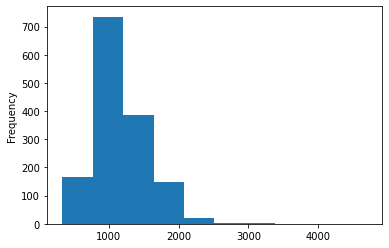

2ndFlrSF


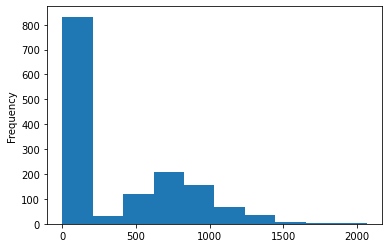

LowQualFinSF


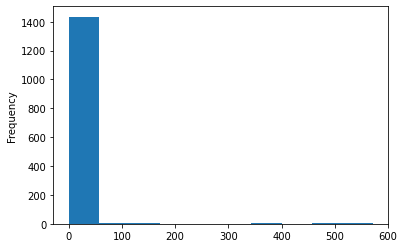

WoodDeckSF


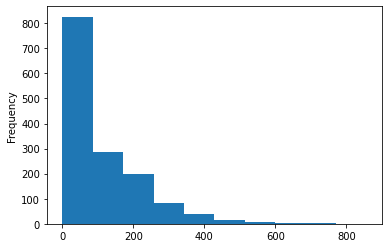

OpenPorchSF


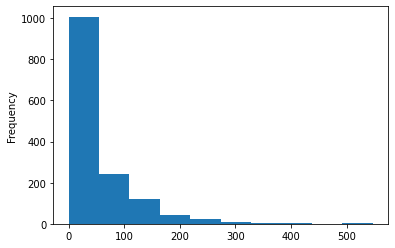

In [123]:
for col in col_sf:
    print(col)
    training_df[col].plot.hist()
    plt.show()

In [125]:
for col in col_sf:
    training_df[col+"_log"] = np.log(training_df[col]+1)

In [130]:
# Feature engineering - Create new feature (ex: years -> ages)
year_of_creation = 2010 # for the dataset
col_year = [col for col in training_df.columns if 'Yr' in col or "Year" in col]
col_year 

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [131]:
training_df["sold_age"] = training_df["YrSold"] - training_df['YearBuilt']
training_df["remod_age"] = training_df["YearRemodAdd"] - training_df['YearBuilt']

In [132]:
# Define a cross validation procedure
from sklearn.model_selection import KFold

In [136]:
fold = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)

In [134]:
training_df.shape

(1460, 287)

In [157]:
lin_model = LinearRegression()
for idx_train , idx_val in fold.split(training_df):
    X_train = training_df.drop(columns=["Id",target_column]).iloc[idx_train]
    Y_train = training_df[[target_column]].iloc[idx_train]
    X_val = training_df.drop(columns=["Id",target_column]).iloc[idx_val]
    Y_val = training_df[[target_column]].iloc[idx_val]
    print(Y_val)

      SalePrice
4        250000
5        143000
7        200000
12       144000
14       157000
...         ...
1409     215000
1411     140000
1423     274970
1438     149700
1448     112000

[292 rows x 1 columns]
      SalePrice
6        307000
13       279500
23       129900
27       306000
31       149350
...         ...
1437     394617
1451     287090
1456     210000
1457     266500
1459     147500

[292 rows x 1 columns]
      SalePrice
1        181500
15       132000
18       159000
19       139000
22       230000
...         ...
1434     160000
1435     174000
1439     197000
1441     149300
1450     136000

[292 rows x 1 columns]
      SalePrice
0        208500
3        140000
9        118000
11       345000
20       325300
...         ...
1449      92000
1453      84500
1454     185000
1455     175000
1458     142125

[292 rows x 1 columns]
      SalePrice
2        223500
8        129900
10       129500
17        90000
21       139400
...         ...
1425     142000
1429    

In [144]:
training_df.drop(columns=["Id",target_column]).values   

array([[6.000e+01, 8.450e+03, 7.000e+00, ..., 7.000e+00, 5.000e+00,
        0.000e+00],
       [2.000e+01, 9.600e+03, 6.000e+00, ..., 3.400e+01, 3.100e+01,
        0.000e+00],
       [6.000e+01, 1.125e+04, 7.000e+00, ..., 9.000e+00, 7.000e+00,
        1.000e+00],
       ...,
       [7.000e+01, 9.042e+03, 7.000e+00, ..., 6.900e+01, 6.900e+01,
        6.500e+01],
       [2.000e+01, 9.717e+03, 5.000e+00, ..., 6.000e+01, 6.000e+01,
        4.600e+01],
       [2.000e+01, 9.937e+03, 5.000e+00, ..., 4.500e+01, 4.300e+01,
        0.000e+00]])

In [80]:
# Perform a grid search accross several models

In [81]:
# Package your model in a pipeline